# [**The origin**](https://github.com/laxmimerit/dog-cat-full-dataset)

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from keras.utils import to_categorical
import matplotlib.pyplot as plt

In [ ]:
# from google.colab import files
# uploaded = files.upload()

from google.colab import drive
drive.mount('/content/drive')
# /content/drive/MyDrive/dog-cat-full-dataset-master/data

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# !unzip dog-cat-full-dataset-master.zip

In [ ]:
import os
import numpy as np
from PIL import Image

def load_image(image_path):
    target_size = (64, 64)
    image = Image.open(image_path)
    image = image.resize(target_size)
    image = np.array(image)
    return image

def preprocess_image(image):
    image = image.astype(np.float32) / 255.0
    # image = (image - 0.5) / 0.5
    return image

def get_data_loaders(data_dir, batch_size):
    train_data_dir = os.path.join(data_dir, 'train')
    test_data_dir = os.path.join(data_dir, 'test')

    train_images, train_labels = [], []
    for i, class_name in enumerate(os.listdir(train_data_dir)): # cats : 0, dogs : 1
        class_dir = os.path.join(train_data_dir, class_name)
        for image_name in os.listdir(class_dir):
            image_path = os.path.join(class_dir, image_name)
            image = load_image(image_path)
            train_images.append(image)
            train_labels.append(i)

    train_images = np.array(train_images)
    train_labels = np.array(train_labels)

    test_images, test_labels = [], []
    for i, class_name in enumerate(os.listdir(test_data_dir)): # cats : 0, dogs : 1
        class_dir = os.path.join(test_data_dir, class_name)
        for image_name in os.listdir(class_dir):
            image_path = os.path.join(class_dir, image_name)
            image = load_image(image_path)
            test_images.append(image)
            test_labels.append(i)

    test_images = np.array(test_images)
    test_labels = np.array(test_labels)

    train_dataset = tf.data.Dataset.from_tensor_slices((train_images, train_labels))
    train_dataset = train_dataset.shuffle(len(train_dataset)).batch(batch_size)

    test_dataset = tf.data.Dataset.from_tensor_slices((test_images, test_labels))
    test_dataset = test_dataset.batch(batch_size)

    return train_images, train_labels, test_images, test_labels, train_dataset, test_dataset

In [ ]:
data_dir = '/content/drive/MyDrive/dog-cat-full-dataset-master/data'
batch_size = 64

train_images, train_labels, test_images, test_labels, _, _ = get_data_loaders(data_dir, batch_size)

In [ ]:
train_labels[0]

1

In [ ]:
test_labels

array([0, 0, 0, ..., 1, 1, 1])

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(64, (3,3), activation='relu', input_shape=(64,64,3)))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(32, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(16, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(8, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2  (None, 31, 31, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 6, 6, 16)          0

In [ ]:
loss=tf.keras.losses.BinaryCrossentropy(from_logits=True)
model.compile(loss=loss, optimizer='adam', metrics=['accuracy']) # use , 'f1_score' later
history = model.fit(train_images, train_labels, epochs=5, validation_split=0.25, verbose=1)


Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5805: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


177/177 [==============================] - 46s 249ms/step - loss: 2.3827e-05 - accuracy: 1.0000 - val_loss: 3.2695e-24 - val_accuracy: 1.0000
Epoch 2/5
177/177 [==============================] - 46s 262ms/step - loss: 7.4414e-27 - accuracy: 1.0000 - val_loss: 3.2695e-24 - val_accuracy: 1.0000
Epoch 3/5
177/177 [==============================] - 44s 248ms/step - loss: 7.4414e-27 - accuracy: 1.0000 - val_loss: 3.2695e-24 - val_accuracy: 1.0000
Epoch 4/5
177/177 [==============================] - 46s 260ms/step - loss: 7.4414e-27 - accuracy: 1.0000 - val_loss: 3.2695e-24 - val_accuracy: 1.0000
Epoch 5/5
177/177 [==============================] - 42s 240ms/step - loss: 7.4414e-27 - accuracy: 1.0000 - val_loss: 3.2695e-24 - val_accuracy: 1.0000


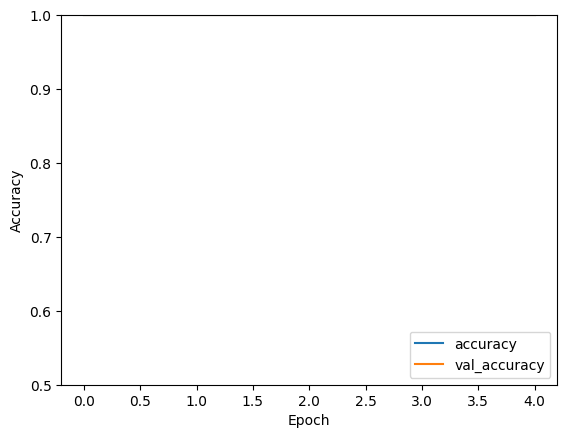

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print(test_loss)
print('\n')
print(test_acc)

157/157 [==============================] - 10s 61ms/step - loss: 90.7966 - accuracy: 0.5000
90.79656982421875


0.5


Do same process but with transfer learning and reduce image sizes to 32x32 pixels. increase the # of epochs to 30 epochs

# Implement Transfer Learning(TL) using the lightweight pre-trained model, MobileNet, for the dogs-cats dataset.

In [ ]:
import keras
from keras import backend as K
from keras.layers import Dense, Activation, GlobalAveragePooling2D
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras.models import Model
from keras.applications import imagenet_utils
from keras.applications import MobileNet
from keras.applications.mobilenet import preprocess_input
import numpy as np
from IPython.display import Image
from keras.optimizers import Adam

In [ ]:
base_model = tf.keras.applications.MobileNetV2(input_shape=(64,64,3), include_top=False, weights='imagenet')

model = tf.keras.Sequential()
model.add(base_model)
model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Func  (None, 2, 2, 1280)        2257984   
 tional)                                                         
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 1, 1, 1280)        0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 1280)              0         
                                                                 
 dense_2 (Dense)             (None, 64)                81984     
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 2340033 (8.93 MB)
Trainable params: 2305

In [ ]:
loss=tf.keras.losses.BinaryCrossentropy(from_logits=True)
model.compile(loss=loss, optimizer='adam', metrics=['accuracy']) # use , 'f1_score' later
history = model.fit(train_images, train_labels, epochs=5, validation_split=0.25, verbose=1)

Epoch 1/5
177/177 [==============================] - 120s 563ms/step - loss: 0.0035 - accuracy: 0.9984 - val_loss: 2.5489e-12 - val_accuracy: 1.0000
Epoch 2/5
177/177 [==============================] - 96s 546ms/step - loss: 2.3545e-06 - accuracy: 1.0000 - val_loss: 1.1819e-10 - val_accuracy: 1.0000
Epoch 3/5
177/177 [==============================] - 108s 608ms/step - loss: 9.4847e-07 - accuracy: 1.0000 - val_loss: 5.5722e-09 - val_accuracy: 1.0000
Epoch 4/5
177/177 [==============================] - 93s 527ms/step - loss: 8.3691e-07 - accuracy: 1.0000 - val_loss: 6.9977e-08 - val_accuracy: 1.0000
Epoch 5/5
177/177 [==============================] - 91s 515ms/step - loss: 4.6913e-07 - accuracy: 1.0000 - val_loss: 2.7805e-07 - val_accuracy: 1.0000


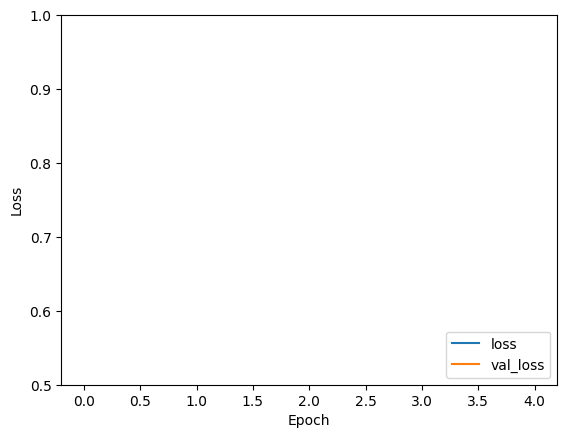

In [ ]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print(test_loss)
print('\n')
print(test_acc)

157/157 [==============================] - 16s 101ms/step - loss: 12.4729 - accuracy: 0.5000
12.472856521606445


0.5
